<a href="https://colab.research.google.com/github/Hyenni/analysis_Astronomy_Data/blob/master/horsehead_fitsfile2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Statistics

### SAMPLE 01. Dynamic Range

* display with a range of unsigned short (0 to 65535)

* display with a range of min to max

In [1]:
#fitsfile upload
from google.colab import files
files.upload()

Saving fitsfile.py to fitsfile.py


{'fitsfile.py': b'#\r\n# SAMPLE 05. Make a class.\r\n#\r\n\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\nimport matplotlib.cm as cm\r\n\r\nclass FitsFile:\r\n\tdef __init__(self):\r\n\t\t# Initialize variables.\r\n\t\tself.file_path = ""\r\n\t\tself.header = ""\r\n\t\tself.data = ""\r\n\r\n\t\tself.bitpix = 0\r\n\t\tself.naxis = 0\r\n\t\tself.naxis1 = 0\r\n\t\tself.naxis2 = 0\r\n\t\tself.bzero = 0\r\n\t\tself.bscale = 1.0\r\n\r\n\t#\r\n\t#\r\n\tdef get_value(self, keyword):\r\n\t\tvalue = ""\r\n\t\trecords = int(len(self.header) / 80)\r\n\r\n\t\tfor i in range(records):\r\n\t\t\trecord = self.header[i*80:(i+1)*80]\r\n\t\t\tif(record.startswith(keyword)):\r\n\t\t\t\tbegin = 9;\r\n\t\t\t\tend = record.find(\'/\', begin, (i+1)*80)\r\n\t\t\t\tif(end == -1):\r\n\t\t\t\t\tend = (i+1)*80\r\n\t\t\t\tvalue = record[begin:end].strip()\r\n\t\t\t\tbreak\r\n\t\t\tif(record.startswith("END")):\r\n\t\t\t\tbreak\r\n\r\n\t\treturn value\r\n\r\n\r\n\tdef load_file(self, file_path):\r\n\t\t

In [4]:
#horsehead.data upload
from google.colab import files
files.upload()

Saving HorseHead.fits to HorseHead.fits


{'HorseHead.fits': b'SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = \'2014-01-09        \'  /FITS: Creation Date                            ORIGIN  = \'STScI/MAST\'         /GSSS: STScI Digitized Sky Survey                SURVEY  = \'SERC-ER \'           /GSSS: Sky Survey                                REGION  = \'ER768   \'           /GSSS: Region Name                               PLATEID = \'A0JP    \'           /GSSS: Plate ID                                  SCANNUM = \'01      \'           /GSSS: Scan Number                               DSCNDNU

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import fitsfile

In [0]:
fits = fitsfile.FitsFile()
fits.load_file("HorseHead.fits")

In [8]:
min = np.min(fits.data)
print (min)
max = np.max(fits.data)
print (max)

3759.0
22918.0


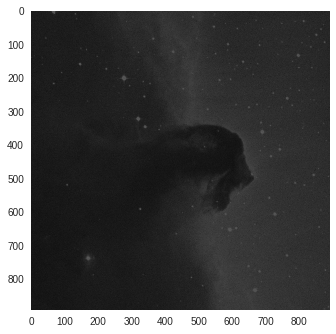

In [11]:
plt.imshow(fits.data, cmap=cm.gray, vmin=0.0, vmax=65536)
plt.grid(None)
plt.show()

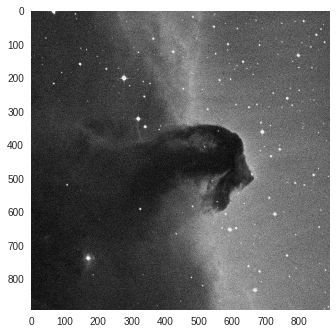

In [13]:
plt.imshow(fits.data, cmap=cm.gray, vmin=min, vmax=max)
plt.grid(None)
plt.show()

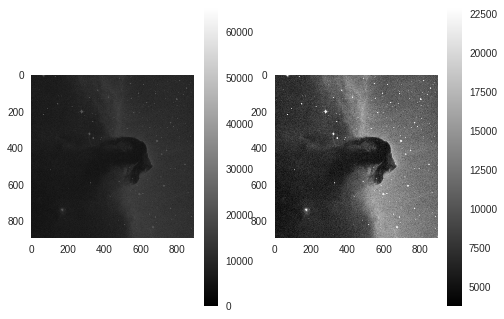

In [38]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(fits.data, cmap=cm.gray, vmin=0.0, vmax=65536)
plt.colorbar(im1, ax=ax1)
plt.grid(None)

ax1 = fig.add_subplot(1,2,2)
im1 = ax1.imshow(fits.data, cmap=cm.gray, vmin=min, vmax=max)
plt.colorbar(im1, ax=ax1)
plt.grid(None)

plt.show()

### SAMPLE 02. Histogram and Cumulative Histogram

In [32]:
range = max - min
print (range)
histogram, x = np.histogram(fits.data, bins=np.arange(min, max, range/256))

19159.0


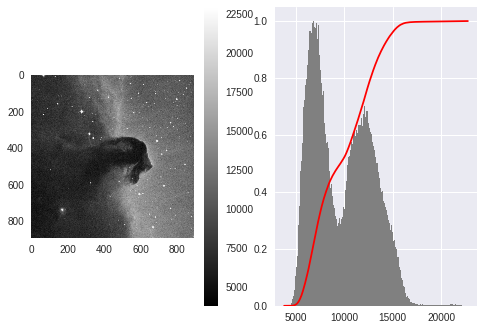

In [40]:
chistogram = np.cumsum(histogram)

histogram = histogram / np.max(histogram)
chistogram = chistogram / np.max(chistogram)

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(fits.data, cmap=cm.gray)
plt.colorbar(im1, ax=ax1)
plt.grid(None)

ax2 = fig.add_subplot(1,2,2)
img2 = ax2.bar(x[:-1], histogram, width=range/256, color="gray")
img2 = ax2.plot(x[:-1], chistogram, color="red")

plt.show()

### SAMPLE 03. Distribution I

* dynamic range (min, max, range)

* average

In [0]:
range = max - min
mean = np.mean(fits.data)
median = np.median(fits.data)
percentile = np.percentile(fits.data, [0, 25, 50, 75, 100])

In [35]:
#dynamic range
print("min = %d, max = %d, range = %d"%(min, max, range))
print("mean = %.2f, median = %.2f"%(mean, median))
print("mode = %d"%(x[np.argmax(histogram)]))
print("percentile : ", percentile)

min = 3759, max = 22918, range = 19159
mean = 9831.48, median = 9658.00
mode = 6827
percentile :  [ 3759.  7076.  9658. 12327. 22918.]


### SAMPLE 04. Distribution II

* variance

* standard deviation

In [0]:
variance = np.var(fits.data)
std = np.std(fits.data)

In [43]:
print("variance = %.2f"%(variance))
print("std= %.2f"%(std))

variance = 9195405.82
std= 3032.39


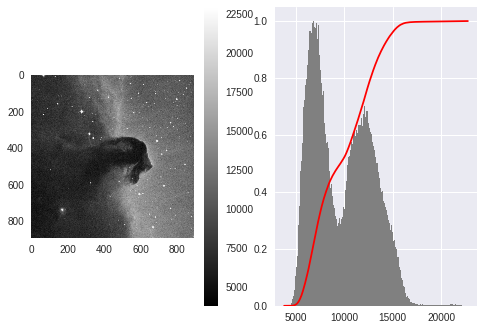

In [46]:
histogram, x = np.histogram(fits.data, bins=np.arange(min, max, range/256))
chistogram = np.cumsum(histogram)

# Normalize
histogram = histogram / np.max(histogram)
chistogram = chistogram / np.max(chistogram)

# Display
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(fits.data, cmap=cm.gray)
plt.colorbar(im1, ax=ax1)
plt.grid(None)

ax2 = fig.add_subplot(1,2,2)
img2 = ax2.bar(x[:-1], histogram, width=range/256, color="gray")
img2 = ax2.plot(x[:-1], chistogram, color="red")

plt.show()